In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


new norfolk au
isangel vu
rikitea pf
ushuaia ar
bethel us
kapaa us
tasiilaq gl
priyutovo ru
dogondoutchi ne
hobart au
mataura pf
thompson ca
hermanus za
bambous virieux mu
hilo us
nelson bay au
busselton au
marzuq ly
geraldton au
khatanga ru
mount isa au
grand river south east mu
upernavik gl
busselton au
ponta do sol cv
praya id
mar del plata ar
lorengau pg
yellowknife ca
busselton au
souillac mu
port blair in
hilo us
ahipara nz
chuy uy
asau tv
jamestown sh
ponta do sol cv
cape town za
loutra gr
busselton au
clermont us
cabo san lucas mx
new norfolk au
chavakkad in
bluff nz
sinop tr
cidreira br
butaritari ki
katsuura jp
constitucion mx
amderma ru
lebu cl
ushuaia ar
taolanaro mg
makakilo city us
vila franca do campo pt
shache cn
ancud cl
naze jp
svetlogorsk ru
saint-philippe re
vaini to
taolanaro mg
albany au
nikolskoye ru
nanortalik gl
kihei us
magugu tz
sao gabriel da cachoeira br
mataura pf
claresholm ca
san fernando mx
ravar ir
rikitea pf
iralaya hn
atuona pf
port elizabeth za
vict

lompoc us
puerto ayora ec
punta arenas cl
sambava mg
banjar id
jamestown sh
fortuna us
el tocuyo ve
illoqqortoormiut gl
albany au
san patricio mx
saleaula ws
port moresby pg
cesis lv
new norfolk au
busselton au
busselton au
longyearbyen sj
khatanga ru
rikitea pf
fare pf
nakano jp
albany au
port-cartier ca
devonport au
orlik ru
dingle ie
lompoc us
fukue jp
goderich sl
solnechnyy ru
yulara au
port elizabeth za
upernavik gl
kashi cn
qaanaaq gl
cherskiy ru
illoqqortoormiut gl
kapaa us
nibbar tn
cabo san lucas mx
samusu ws
trindade br
geraldton au
new norfolk au
bredasdorp za
mogadishu so
urumqi cn
kloulklubed pw
nikolskoye ru
griffith au
lebu cl
illoqqortoormiut gl
moultonborough us
avarua ck
cluses fr
severo-kurilsk ru
bambous virieux mu
pilar br
muravlenko ru
tres arroyos ar
new norfolk au
narsaq gl
yerbogachen ru
vao nc
rikitea pf
leningradskiy ru
kununurra au
taolanaro mg
saint-georges gf
khatanga ru
ushuaia ar
mataura pf
victoria sc
zoersel be
port alfred za
adamas gr
illoqqortoormiut

gravdal no
khandyga ru
port alfred za
tuktoyaktuk ca
chipinge zw
taolanaro mg
rikitea pf
tasiilaq gl
adrar dz
ahipara nz
salamiyah sy
hamilton bm
ushuaia ar
chuy uy
kaeo nz
jamestown sh
hearst ca
tasiilaq gl
attawapiskat ca
norden de
hambantota lk
balimo pg
norman wells ca
pleshanovo ru
rikitea pf
dawei mm
bluff nz
manadhoo mv
santa maria cv
busselton au
miles city us
luderitz na
bronderslev dk
ushuaia ar
nanortalik gl
yellowknife ca
ushuaia ar
tuktoyaktuk ca
nizhneyansk ru
ushuaia ar
busselton au
luanda ao
port alfred za
haldibari in
vardo no
cape town za
vaitupu wf
mataura pf
vardo no
lagoa pt
cabo san lucas mx
qaanaaq gl
cedar city us
kaitangata nz
dunedin nz
punta arenas cl
toppenish us
sentyabrskiy ru
saint anthony ca
mataura pf
atuona pf
longyearbyen sj
albany au
kuching my
san patricio mx


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [7]:
import requests
requests.__version__

'2.27.1'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0bb998b096ab5825822b2e3ffb1bb708"

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | isangel
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | priyutovo
Processing Record 9 of Set 1 | dogondoutchi
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | nelson bay
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | marzuq
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | grand river south east
City not found. Skipping...
Pr

Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | karla
Processing Record 41 of Set 4 | paragominas
Processing Record 42 of Set 4 | ribeira grande
Processing Record 43 of Set 4 | babanusah
City not found. Skipping...
Processing Record 44 of Set 4 | waipawa
Processing Record 45 of Set 4 | arrah
Processing Record 46 of Set 4 | sinjar
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | dudinka
Processing Record 49 of Set 4 | benjamin aceval
Processing Record 50 of Set 4 | murbad
Processing Record 1 of Set 5 | lenger
Processing Record 2 of Set 5 | bakau
Processing Record 3 of Set 5 | jumla
Processing Record 4 of Set 5 | pokhara
Processing Record 5 of Set 5 | ocos
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | roma
Processing Record 9 of Set 5 | sorland
Processing Record 10 of Set 5 | aquiraz
Processing Record 11 of Set 5 | muscatine
Processing Record 12 of Set 5 | asosa
Proces

City not found. Skipping...
Processing Record 33 of Set 8 | aripuana
Processing Record 34 of Set 8 | bubaque
Processing Record 35 of Set 8 | henties bay
Processing Record 36 of Set 8 | coquimbo
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | makinsk
Processing Record 39 of Set 8 | la palma
Processing Record 40 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 41 of Set 8 | kargasok
Processing Record 42 of Set 8 | alofi
Processing Record 43 of Set 8 | lazi
Processing Record 44 of Set 8 | mackay
Processing Record 45 of Set 8 | dongobesh
Processing Record 46 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 8 | bairnsdale
Processing Record 48 of Set 8 | aranos
Processing Record 49 of Set 8 | maple creek
Processing Record 50 of Set 8 | rumphi
Processing Record 1 of Set 9 | panama city
Processing Record 2 of Set 9 | san jose
Processing Record 3 of Set 9 | jalu
Processing Record 4 of Set 9 | ugoofaaru
Processing Record 5 of

Processing Record 22 of Set 12 | adrar
Processing Record 23 of Set 12 | salamiyah
Processing Record 24 of Set 12 | kaeo
Processing Record 25 of Set 12 | hearst
Processing Record 26 of Set 12 | norden
Processing Record 27 of Set 12 | norman wells
Processing Record 28 of Set 12 | pleshanovo
Processing Record 29 of Set 12 | dawei
Processing Record 30 of Set 12 | manadhoo
Processing Record 31 of Set 12 | santa maria
Processing Record 32 of Set 12 | miles city
Processing Record 33 of Set 12 | bronderslev
Processing Record 34 of Set 12 | luanda
Processing Record 35 of Set 12 | haldibari
Processing Record 36 of Set 12 | cedar city
Processing Record 37 of Set 12 | toppenish
-----------------------------
Data Retrieval Complete      
-----------------------------


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,60.75,75,51,0.85,AU,2022-02-14 15:31:06
1,Isangel,-19.5500,169.2667,78.91,89,20,0.00,VU,2022-02-14 15:32:19
2,Rikitea,-23.1203,-134.9692,77.86,70,70,9.01,PF,2022-02-14 15:31:00
3,Ushuaia,-54.8000,-68.3000,49.66,46,75,9.22,AR,2022-02-14 15:31:17
4,Bethel,41.3712,-73.4140,21.04,48,0,16.11,US,2022-02-14 15:31:33
5,Kapaa,22.0752,-159.3190,64.72,88,75,6.91,US,2022-02-14 15:31:39
6,Tasiilaq,65.6145,-37.6368,23.16,61,100,46.39,GL,2022-02-14 15:31:59
7,Priyutovo,53.9000,53.9333,9.45,96,100,5.84,RU,2022-02-14 15:33:34
8,Dogondoutchi,13.6393,4.0287,96.39,7,54,7.31,NE,2022-02-14 15:33:34
9,Hobart,-42.8794,147.3294,61.11,91,100,5.75,AU,2022-02-14 15:29:09


In [17]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-02-14 15:31:06,-42.7826,147.0587,60.75,75,51,0.85
1,Isangel,VU,2022-02-14 15:32:19,-19.5500,169.2667,78.91,89,20,0.00
2,Rikitea,PF,2022-02-14 15:31:00,-23.1203,-134.9692,77.86,70,70,9.01
3,Ushuaia,AR,2022-02-14 15:31:17,-54.8000,-68.3000,49.66,46,75,9.22
4,Bethel,US,2022-02-14 15:31:33,41.3712,-73.4140,21.04,48,0,16.11
...,...,...,...,...,...,...,...,...,...
547,Bronderslev,DK,2022-02-14 15:37:11,57.2702,9.9410,45.90,84,100,20.24
548,Luanda,AO,2022-02-14 15:37:11,-8.8368,13.2343,86.00,51,40,9.22
549,Haldibari,IN,2022-02-14 15:37:12,26.3333,88.7667,67.35,43,0,3.62
550,Cedar City,US,2022-02-14 15:28:58,37.6775,-113.0619,27.57,50,0,4.61


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644853121.2900906

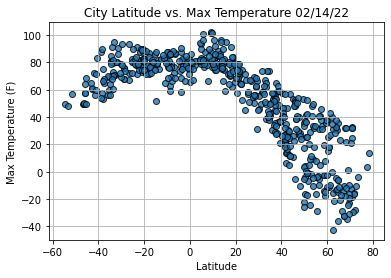

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

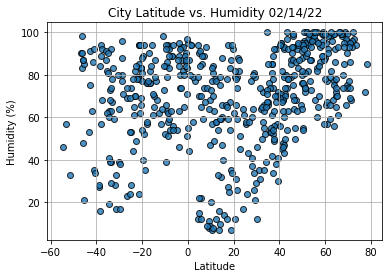

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

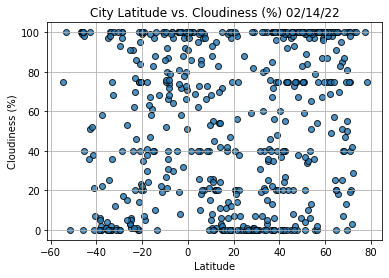

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

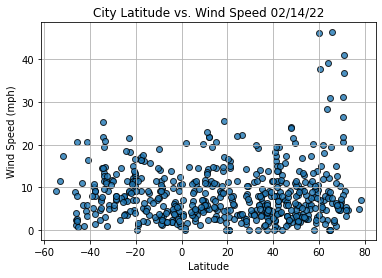

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [30]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13


City              Bambous Virieux
Country                        MU
Date          2022-02-14 15:31:21
Lat                      -20.3428
Lng                       57.7575
Max Temp                    82.65
Humidity                       83
Cloudiness                     75
Wind Speed                   11.5
Name: 13, dtype: object

In [31]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
547     True
548    False
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Bethel,US,2022-02-14 15:31:33,41.3712,-73.4140,21.04,48,0,16.11
5,Kapaa,US,2022-02-14 15:31:39,22.0752,-159.3190,64.72,88,75,6.91
6,Tasiilaq,GL,2022-02-14 15:31:59,65.6145,-37.6368,23.16,61,100,46.39
7,Priyutovo,RU,2022-02-14 15:33:34,53.9000,53.9333,9.45,96,100,5.84
8,Dogondoutchi,NE,2022-02-14 15:33:34,13.6393,4.0287,96.39,7,54,7.31
...,...,...,...,...,...,...,...,...,...
546,Miles City,US,2022-02-14 15:37:10,46.4083,-105.8406,31.51,80,0,5.75
547,Bronderslev,DK,2022-02-14 15:37:11,57.2702,9.9410,45.90,84,100,20.24
549,Haldibari,IN,2022-02-14 15:37:12,26.3333,88.7667,67.35,43,0,3.62
550,Cedar City,US,2022-02-14 15:28:58,37.6775,-113.0619,27.57,50,0,4.61


In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Bethel,US,2022-02-14 15:31:33,41.3712,-73.4140,21.04,48,0,16.11
5,Kapaa,US,2022-02-14 15:31:39,22.0752,-159.3190,64.72,88,75,6.91
6,Tasiilaq,GL,2022-02-14 15:31:59,65.6145,-37.6368,23.16,61,100,46.39
7,Priyutovo,RU,2022-02-14 15:33:34,53.9000,53.9333,9.45,96,100,5.84
8,Dogondoutchi,NE,2022-02-14 15:33:34,13.6393,4.0287,96.39,7,54,7.31


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

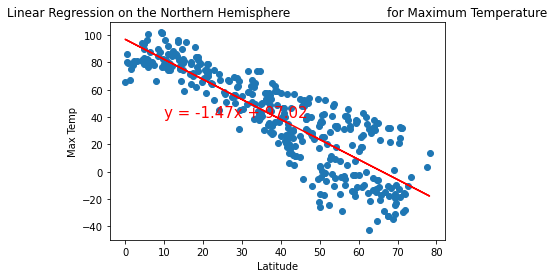

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

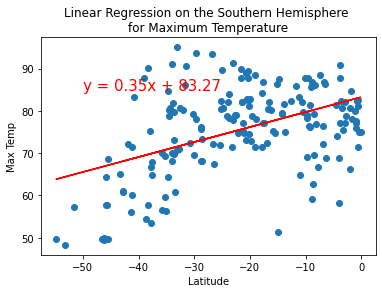

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

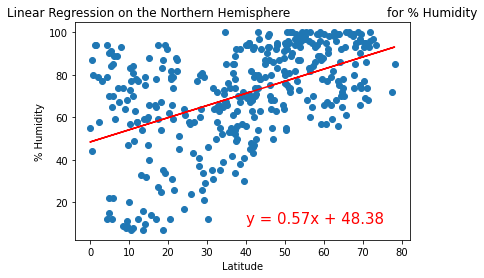

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

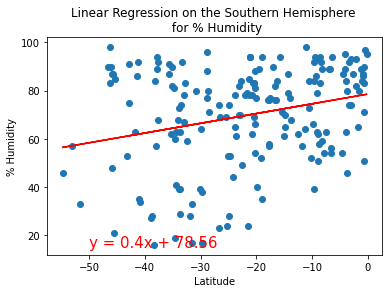

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

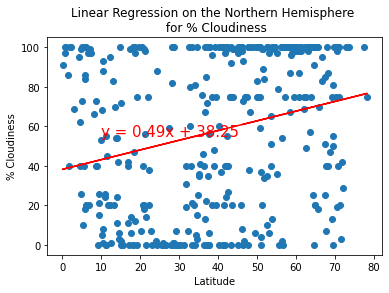

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))



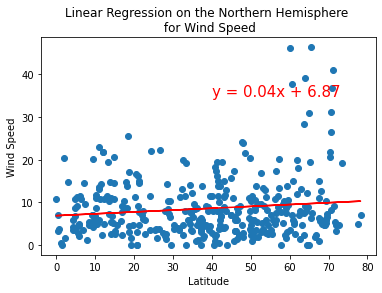

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

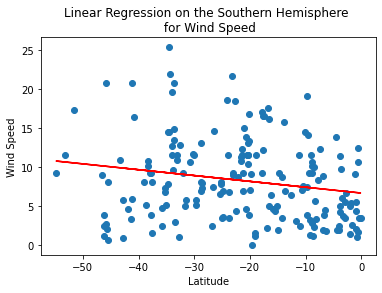

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))